This notebook will be used for capstone project for Applied Data Science Capstone course. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Hello Capstone Project Course!')


Hello Capstone Project Course!


In [2]:
df = pd.read_csv('./Downloads/199387_1319582_compressed_US_Accidents_June20.csv/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [111]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Temperature(F)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Roundabout', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Amenity', 'Railway', 'Stop', 'Station', 'Give_Way',
       'Delay(hrs)', 'Day_Of_Week', 'Day_Name', 'Time',
       'Mean Precipitation(in)'],
      dtype='object')

In [3]:
df.shape

(3513617, 49)

#### Data Cleaning

Let's only keep the columns that we are intersted.

In [3]:
columns_to_keep = ['ID', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone',
       'Temperature(F)',
       'Visibility(mi)', 'Wind_Chill(F)','Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition','Crossing',
       'Junction', 'Roundabout',
       'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Amenity','Railway','Stop','Station', 'Give_Way']

df = df[columns_to_keep]
df.shape

(3513617, 32)

In [4]:
# to find the actual delay in terms of hours
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format = "%Y/%m/%d %H:%M:%S")
df['End_Time'] = pd.to_datetime(df['End_Time'], format = "%Y/%m/%d %H:%M:%S")
df['Delay(hrs)'] = (df['End_Time'] - df['Start_Time'])/np.timedelta64(1, 'h')
df.head(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,...,Roundabout,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Amenity,Railway,Stop,Station,Give_Way,Delay(hrs)
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,I-70 E,R,Dayton,...,False,False,False,Night,False,False,False,False,False,5.233333
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Brice Rd,L,Reynoldsburg,...,False,False,False,Night,False,False,False,False,False,0.500000
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,...,False,True,False,Night,False,False,False,False,False,0.500000
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,R,Dayton,...,False,False,False,Night,False,False,False,False,False,0.500000
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,...,False,True,False,Day,False,False,False,False,False,0.500000
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,...,False,False,False,Day,False,False,False,False,False,0.500000
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,N Woodward Ave,R,Dayton,...,False,False,False,Day,False,False,False,False,False,0.500000
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,0.01,N Main St,R,Dayton,...,False,False,False,Day,False,False,False,False,False,0.500000
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.00,Notre Dame Ave,L,Dayton,...,False,False,False,Day,False,False,False,False,False,0.500000
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,...,False,False,False,Day,False,False,False,False,False,0.500000


In [12]:
# Let's get day of week
df['Day_Of_Week'] = df['Start_Time'].dt.weekday
df['Day_Name'] = df['Start_Time'].dt.day_name()
df['Day_Name'].head()

5     Monday
9     Monday
11    Monday
14    Monday
20    Monday
Name: Day_Name, dtype: object

In [13]:
# Let's get time of the day
df['Time'] = df['Start_Time'].dt.hour

##### Dealing with missing values

In [51]:
# Let's count the number of missing values in each columns
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

ID
False    1282849
Name: ID, dtype: int64

Severity
False    1282849
Name: Severity, dtype: int64

Start_Time
False    1282849
Name: Start_Time, dtype: int64

End_Time
False    1282849
Name: End_Time, dtype: int64

Start_Lat
False    1282849
Name: Start_Lat, dtype: int64

Start_Lng
False    1282849
Name: Start_Lng, dtype: int64

Distance(mi)
False    1282849
Name: Distance(mi), dtype: int64

Street
False    1282849
Name: Street, dtype: int64

Side
False    1282849
Name: Side, dtype: int64

City
False    1282849
Name: City, dtype: int64

County
False    1282849
Name: County, dtype: int64

State
False    1282849
Name: State, dtype: int64

Zipcode
False    1282849
Name: Zipcode, dtype: int64

Country
False    1282849
Name: Country, dtype: int64

Timezone
False    1282849
Name: Timezone, dtype: int64

Temperature(F)
False    1282849
Name: Temperature(F), dtype: int64

Visibility(mi)
False    1282849
Name: Visibility(mi), dtype: int64

Wind_Chill(F)
False    1282849
Name: Wind_Chill(F), dt

Since the __Precipitation__ column is missing 2,025,874 values, hence instead drop all rows we want to replace the missing values with mean.

In [36]:
average = df['Precipitation(in)'].astype('float').mean()
df['Precipitation(in)'].replace(np.nan, average, inplace=True)

In [27]:
average1 = df['Wind_Chill(F)'].astype('float').mean()
df['Wind_Chill(F)'].replace(np.nan, average, inplace=True)

For missing values among other columns, we simply drop the rows containing the missing values.

In [6]:
df = df.dropna( axis = 0)
df.shape

(1282849, 34)

##### Formatting the data

In [9]:
# checking the datatypes of each column
df.dtypes

ID                           object
Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
Distance(mi)                float64
Street                       object
Side                         object
City                         object
County                       object
State                        object
Zipcode                      object
Country                      object
Timezone                     object
Temperature(F)              float64
Visibility(mi)              float64
Wind_Chill(F)               float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            object
Crossing                       bool
Junction                       bool
Roundabout                     bool
Traffic_Signal                 bool
Turning_Loop                   bool
Sunrise_Sunset               object
Amenity                     

We want to convert the boolean data into numerical values as; 1 for True and 0 for false

In [7]:
# Similarly let's assign 1 and 0 for columns containing boolean data
df = df.replace([True, False], [1, 0])
df.shape

(1282849, 34)

#### Data Visualization

Let's start by visualizing total number of accidents in each category.

<Figure size 432x288 with 0 Axes>

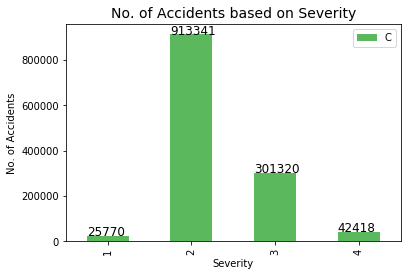

In [9]:
fig = plt.figure()
ax0 = df[['ID','Severity']].groupby('Severity').count().plot(kind='bar', color = '#5cb85c')
# to display the total number of accidents above the bar
for i in ax0.patches:
    ax0.text(i.get_x(), i.get_height()+0.5, str((i.get_height())), fontsize=12)
    
ax0.set_ylabel('No. of Accidents') 
ax0.set_title('No. of Accidents based on Severity', fontsize = 14)
ax0.legend('Count')
plt.savefig('severity.png', bbox_inches='tight')   

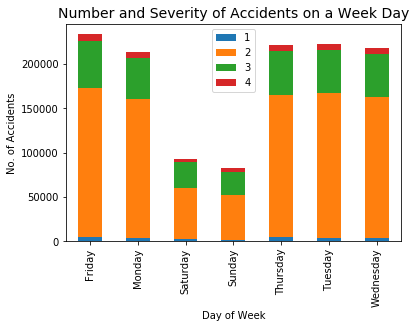

In [54]:
df[['ID', 'Severity', 'Day_Name']].groupby(['Day_Name','Severity']).count().unstack().plot(kind='bar', stacked=True)
plt.legend([1,2,3,4])
plt.ylabel('No. of Accidents')
plt.xlabel('Day of Week')
plt.title('Number and Severity of Accidents on a Week Day', fontsize = 14)
plt.savefig('weekday.png', bbox_inches='tight')

We see that number of accidents is typically higher on a weekday as compared to the weekends. This can be related to the number of vehicles on the road. Since, over the weekends, less vehicles use the road resulting in lesser accidents.

In [59]:
# Let's visualize where the maximum number of accidents is happening by using pie charts.
# we are going to use different road conditions
total = df[['Crossing',
       'Junction',
       'Traffic_Signal',
        'Amenity','Railway','Stop','Station', 'Give_Way']].sum(axis=0)


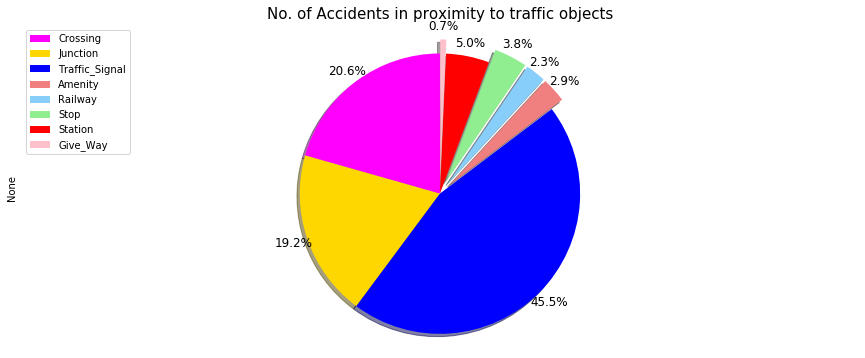

In [60]:
colors_list = ['magenta','gold', 'blue', 'lightcoral', 'lightskyblue', 'lightgreen', 'red', 'pink']
explode_list = [0,0,0,0.1,0.1,0.1,0,0.1]
total.plot(kind='pie', autopct='%1.1f%%', colors = colors_list,
                        startangle=90, shadow= True,
                        labels = None, pctdistance= 1.10,
                        figsize = (15,6), explode= explode_list, fontsize=12)
plt.title('No. of Accidents in proximity to traffic objects', fontsize = 15)
plt.axis('equal')
plt.legend(labels=['Crossing',
       'Junction',
       'Traffic_Signal',
        'Amenity','Railway','Stop','Station', 'Give_Way'], loc ='upper left')
plt.savefig('pie.png', bbox_inches='tight')

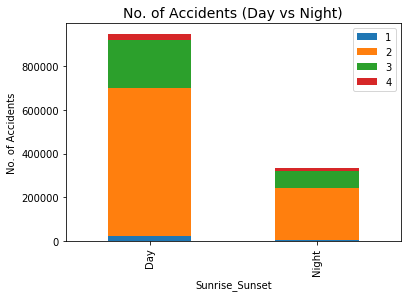

In [63]:
df[['ID', 'Severity', 'Sunrise_Sunset']].groupby(['Sunrise_Sunset','Severity']).count().unstack().plot(kind='bar', stacked=True)
plt.ylabel('No. of Accidents')
plt.title('No. of Accidents (Day vs Night)', fontsize=14)
plt.legend([1,2,3,4])
plt.savefig('daynight.png', bbox_inches='tight')

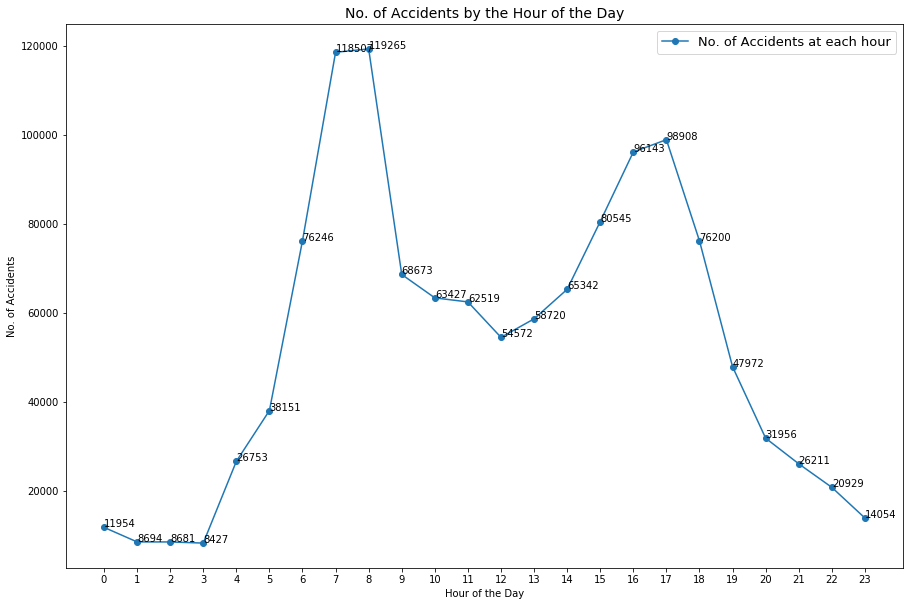

In [64]:
df_group1 = df[['ID','Time']].groupby('Time').count()
df_group1.plot(kind='line', figsize=(15,10), marker = 'o')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Accidents')
plt.title('No. of Accidents by the Hour of the Day', fontsize =14)
plt.xticks(np.arange(0, len(df['Time'].unique()), step = 1))
for i,j in zip(df_group1.index, df_group1.ID):
    plt.annotate(str(j), xy=(i,j))
plt.legend( ['No. of Accidents at each hour'], loc='best', fontsize=13)  
plt.savefig('athour.png', bbox_inches='tight')

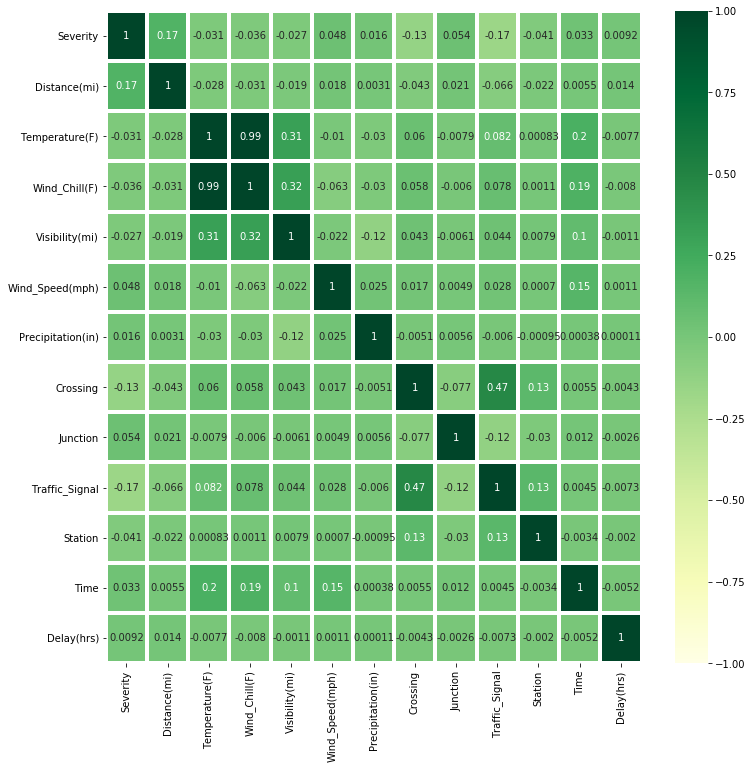

In [65]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df[['Severity','Distance(mi)',
       'Temperature(F)','Wind_Chill(F)','Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)','Crossing',
       'Junction',
       'Traffic_Signal',
       'Sunrise_Sunset','Station', 'Time', 'Delay(hrs)']].corr(), 
                 vmin=-1, vmax=1, annot=True,
                linewidth = 3, cmap = 'YlGn')


Let's visualize how different weather conditions affect the severity of the accident.

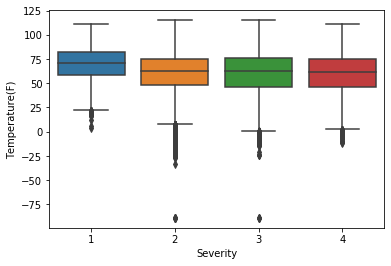

In [66]:
# Let's use temperature as a feature
sns.boxplot(data=df, y= 'Temperature(F)', x = 'Severity')
df[['Severity', 'Temperature(F)']].groupby('Severity').mean()
plt.savefig('box1.png', bbox_inches='tight')

,Precipitation(in)
Severity,
1,0.005408
2,0.006966
3,0.011394
4,0.007558


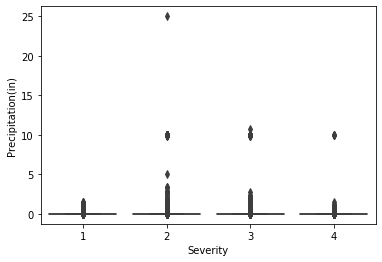

In [68]:
# Let's use precipitation as a feature
sns.boxplot(data=df, y= 'Precipitation(in)', x = 'Severity')
plt.savefig('boxpreci.png', bbox_inches='tight')
df[['Severity', 'Precipitation(in)']].groupby('Severity').mean()

,Visibility(mi)
Severity,
1,9.500240
2,8.880002
3,8.728982
4,8.843497


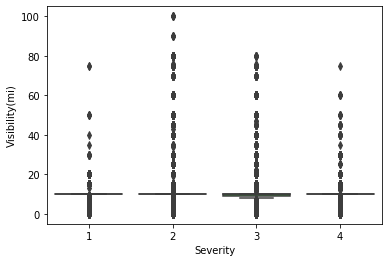

In [69]:
# let's see the effect of Visibility
sns.boxplot(data=df, y= 'Visibility(mi)', x = 'Severity')
plt.savefig('boxpvisi.png', bbox_inches='tight')
df[['Severity', 'Visibility(mi)']].groupby('Severity').mean()


,Wind_Speed(mph)
Severity,
1,8.338265
2,7.338537
3,8.169872
4,7.945936


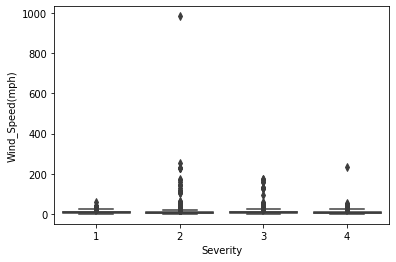

In [68]:
# let's see the effect of Wind speed
sns.boxplot(data=df, y= 'Wind_Speed(mph)', x = 'Severity')
df[['Severity', 'Wind_Speed(mph)']].groupby('Severity').mean()

,Wind_Chill(F)
Severity,
1,70.144137
2,59.569060
3,59.150609
4,58.066307


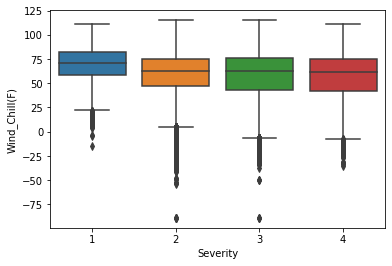

In [70]:
# let's use wind chill
sns.boxplot(data=df, y= 'Wind_Chill(F)', x = 'Severity')
plt.savefig('boxwindchi.png', bbox_inches='tight')
df[['Severity', 'Wind_Chill(F)']].groupby('Severity').mean()

Now that we have identified some of the key features, we will use them to build our model.

In [16]:
feature_set = ['Temperature(F)',
       'Visibility(mi)', 'Wind_Chill(F)','Wind_Speed(mph)',
       'Precipitation(in)','Crossing',
       'Junction',
       'Traffic_Signal',
       'Amenity','Railway','Stop','Station', 'Give_Way', 'Day_Name', 'Time']

In [17]:
df_feature = df[feature_set]
df_feature.shape

(1282849, 15)

We will begin by transforming our data.

In [73]:
# Transforming Sunrise_Sunset
daynight = pd.get_dummies(df_feature.Sunrise_Sunset, prefix = 'is')
df_feature = pd.concat([df_feature, daynight], axis=1)
# now we don't need Sunrise_Sunset column
df_feature = df_feature.drop('Sunrise_Sunset', axis=1)
df_feature.head()

,Temperature(F),Visibility(mi),Wind_Chill(F),Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Amenity,Railway,Stop,Station,Give_Way,Day_Name,Time,is_Day,is_Night
5,37.9,7.0,35.5,3.5,0.03,0,0,0,0,0,0,0,0,Monday,7,1,0
9,37.4,3.0,33.8,4.6,0.02,0,0,0,0,0,0,0,0,Monday,8,1,0
11,37.4,3.0,33.8,4.6,0.02,0,1,0,0,0,0,0,0,Monday,8,1,0
14,37.4,3.0,33.8,4.6,0.02,0,0,1,0,0,0,0,0,Monday,8,1,0
20,33.8,2.0,29.6,4.6,0.01,0,0,0,0,0,0,0,0,Monday,10,1,0


In [18]:
# we label the boolean values for traffic objects
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_feature[['Crossing',
       'Junction',
       'Traffic_Signal', 'Amenity','Railway','Stop','Station', 'Give_Way']].apply(le.fit_transform)
df_feature.head()

,Temperature(F),Visibility(mi),Wind_Chill(F),Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Amenity,Railway,Stop,Station,Give_Way,Day_Name,Time
5,37.9,7.0,35.5,3.5,0.03,0,0,0,0,0,0,0,0,Monday,7
9,37.4,3.0,33.8,4.6,0.02,0,0,0,0,0,0,0,0,Monday,8
11,37.4,3.0,33.8,4.6,0.02,0,1,0,0,0,0,0,0,Monday,8
14,37.4,3.0,33.8,4.6,0.02,0,0,1,0,0,0,0,0,Monday,8
20,33.8,2.0,29.6,4.6,0.01,0,0,0,0,0,0,0,0,Monday,10


In [19]:
# Let's encode the day name
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_feature.Day_Name = le.fit_transform(df_feature.Day_Name)
df_feature.head()

C:\Users\shambhu\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Temperature(F),Visibility(mi),Wind_Chill(F),Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Amenity,Railway,Stop,Station,Give_Way,Day_Name,Time
5,37.9,7.0,35.5,3.5,0.03,0,0,0,0,0,0,0,0,1,7
9,37.4,3.0,33.8,4.6,0.02,0,0,0,0,0,0,0,0,1,8
11,37.4,3.0,33.8,4.6,0.02,0,1,0,0,0,0,0,0,1,8
14,37.4,3.0,33.8,4.6,0.02,0,0,1,0,0,0,0,0,1,8
20,33.8,2.0,29.6,4.6,0.01,0,0,0,0,0,0,0,0,1,10


##### Data normalization


In [20]:
from sklearn.preprocessing import StandardScaler
X = df_feature[['Temperature(F)',
       'Visibility(mi)', 'Wind_Chill(F)','Wind_Speed(mph)',
       'Precipitation(in)', 'Time', 'Day_Name']].values
X = StandardScaler().fit(X).transform(X.astype(float))
X_df = pd.DataFrame(X)
X_df = X_df.rename({0:'Temperature', 1:'Visibility', 2:'Wind_Chill', 3:'Wind_Speed', 4:'Precipitation', 5:'Time', 6:'Day_Name'}, axis=1)
X_df.head()

,Temperature,Visibility,Wind_Chill,Wind_Speed,Precipitation,Time,Day_Name
0,-1.232530,-0.627549,-1.139136,-0.734263,0.233503,-0.986504,-0.951381
1,-1.259111,-1.980184,-1.219378,-0.536007,0.127393,-0.793809,-0.951381
2,-1.259111,-1.980184,-1.219378,-0.536007,0.127393,-0.793809,-0.951381
3,-1.259111,-1.980184,-1.219378,-0.536007,0.127393,-0.793809,-0.951381
4,-1.450493,-2.318342,-1.417624,-0.536007,0.021283,-0.408418,-0.951381


In [21]:
# we concat the normalized data into df_feature
# But make to drop the columns with the same name to aviod any confusion
df_feature = df_feature.drop(['Temperature(F)',
       'Visibility(mi)', 'Wind_Chill(F)','Wind_Speed(mph)',
       'Precipitation(in)', 'Time', 'Day_Name'], axis = 1)
df_feature = pd.merge(left = df_feature, right = X_df, how='left', left_index=True, right_index=True)
df_feature['Severity'] = df['Severity']
df_feature.head()

,Crossing,Junction,Traffic_Signal,Amenity,Railway,Stop,Station,Give_Way,Temperature,Visibility,Wind_Chill,Wind_Speed,Precipitation,Time,Day_Name,Severity
5,0,0,0,0,0,0,0,0,-1.381383,-0.965707,-1.464825,0.094808,0.127393,-0.215723,-0.951381,3
9,0,0,0,0,0,0,0,0,-1.126207,0.386927,-1.261859,0.707599,-0.084827,0.362362,-0.951381,3
11,0,1,0,0,0,0,0,0,-1.429228,0.386927,-1.342102,-0.734263,0.127393,0.940448,-0.951381,3
14,0,0,1,0,0,0,0,0,-2.035271,-1.642025,-2.271969,0.707599,-0.084827,-1.371894,0.881928,2
20,0,0,0,0,0,0,0,0,-2.024639,-2.318342,-2.338051,1.338414,-0.084827,-1.179199,0.881928,2


In [22]:
# making sure there aren't any NAN values
df_feature = df_feature.dropna( axis = 0)

In [23]:
df_feature.shape

(727652, 16)

Now, our feature set is ready, which has 17 features. We will apply Machine learning classification algorithm to build the model. The model will be build baesed on training data and test data will be used to evaluate the accuracy of the model.

In [24]:
# the target variable 
y = df_feature['Severity']
y.shape

(727652,)

In [25]:
X_feature = df_feature[['Crossing', 'Junction', 'Traffic_Signal', 'Amenity', 'Railway', 'Stop',
       'Station', 'Give_Way', 'Day_Name', 'Time',
       'Temperature', 'Visibility', 'Wind_Chill', 'Wind_Speed',
       'Precipitation']]

##### Splitting data into train and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state =4)

print('Train set: ', X_train.shape, y_train.shape)

Train set:  (582121, 15) (582121,)


In [27]:
# Let's check the overall data one more time
missing_data = X_feature.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Crossing
False    727652
Name: Crossing, dtype: int64

Junction
False    727652
Name: Junction, dtype: int64

Traffic_Signal
False    727652
Name: Traffic_Signal, dtype: int64

Amenity
False    727652
Name: Amenity, dtype: int64

Railway
False    727652
Name: Railway, dtype: int64

Stop
False    727652
Name: Stop, dtype: int64

Station
False    727652
Name: Station, dtype: int64

Give_Way
False    727652
Name: Give_Way, dtype: int64

Day_Name
False    727652
Name: Day_Name, dtype: int64

Time
False    727652
Name: Time, dtype: int64

Temperature
False    727652
Name: Temperature, dtype: int64

Visibility
False    727652
Name: Visibility, dtype: int64

Wind_Chill
False    727652
Name: Wind_Chill, dtype: int64

Wind_Speed
False    727652
Name: Wind_Speed, dtype: int64

Precipitation
False    727652
Name: Precipitation, dtype: int64



In [84]:
# What about the data types
X_feature.dtypes

Crossing            int64
Junction            int64
Traffic_Signal      int64
Amenity             int64
Railway             int64
Stop                int64
Station             int64
Give_Way            int64
Day_Name            int32
Time                int64
is_Day              uint8
is_Night            uint8
Temperature       float64
Visibility        float64
Wind_Chill        float64
Wind_Speed        float64
Precipitation     float64
dtype: object

#### First we apply K Nearest Neighbor (KNN) algorithm

In [ ]:
# importing the necessary library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

# create an instance
knn = KNeighborsClassifier()

# we are going use GridSearchCV to find the best set of parameters
# define the hyperparameters

params = {'n_neighbors': [5,10],
         'weights': ['uniform','distance'],
         'algorithm':['auto', 'brute']}

grid_knn = GridSearchCV(estimator = knn, param_grid = params,
                         scoring = 'accuracy', cv =2,  # cv is number of cross-validation to try for each selected set of hyperparameters
                          verbose =1, n_jobs = -1)

grid_knn.fit(X_train, y_train)

# extract best estimator
print("The best set of parameters ", grid_knn.best_estimator_)

# let's make prediction
yhat = grid_knn.predict(X_test)

# Let's print out evaluation metrices
print("Accuracy: ", accuracy_score(yhat, y_test))
print("F1_score:", f1_score(yhat, y_test))
print("Precision:", precision_score(yhat, y_test))
print("Recall:", recall_score(yhat, y_test))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
# importing the necessary library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

# create an instance
knn = KNeighborsClassifier()

# we are going use GridSearchCV to find the best set of parameters
# define the hyperparameters

params = {'n_neighbors': [5,10,15,20],
         'weights': ['uniform', 'distance'],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(estimator = knn, param_grid = params,
                         scoring = 'accuracy', cv =2,  # cv is number of cross-validation to try for each selected set of hyperparameters
                          verbose =1, n_jobs = -1)

grid_knn.fit(X_train, y_train)

# extract best estimator
print("The best set of parameters ", grid_knn.best_estimator_)

# let's make prediction
yhat = grid_knn.predict(X_test)

# Let's print out evaluation metrices
print("Accuracy: ", accuracy_score(yhat, y_test))
print("F1_score:", f1_score(yhat, y_test))
print("Precision:", precision_score(yhat, y_test))
print("Recall:", recall_score(yhat, y_test))




Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [207]:
np.isnan(X_train).any(), np.isnan(X_test).any(), np.isnan(y_train).any(), np.isnan(y_test).any()

(Crossing          False
 Junction          False
 Traffic_Signal    False
 Amenity           False
 Railway           False
 Stop              False
 Station           False
 Give_Way          False
 Day_Name          False
 Time              False
 is_Day            False
 is_Night          False
 Temperature        True
 Visibility         True
 Wind_Chill         True
 Wind_Speed         True
 Precipitation      True
 dtype: bool,
 Crossing          False
 Junction          False
 Traffic_Signal    False
 Amenity           False
 Railway           False
 Stop              False
 Station           False
 Give_Way          False
 Day_Name          False
 Time              False
 is_Day            False
 is_Night          False
 Temperature        True
 Visibility         True
 Wind_Chill         True
 Wind_Speed         True
 Precipitation      True
 dtype: bool,
 False,
 False)

In [208]:
np.isnan(X_train).any()

Crossing          False
Junction          False
Traffic_Signal    False
Amenity           False
Railway           False
Stop              False
Station           False
Give_Way          False
Day_Name          False
Time              False
is_Day            False
is_Night          False
Temperature        True
Visibility         True
Wind_Chill         True
Wind_Speed         True
Precipitation      True
dtype: bool